# Visualizations of WL sampling

By: William Tong (wlt2115)

In [22]:
from pathlib import Path

import matplotlib.pyplot as plt 
import numpy as np
from scipy.special import softmax

from deep_learning import util

%matplotlib inline
%config IPCompleter.greedy=True


# Helper
# TODO: unify in utils
def _get_density(values: list) -> list:
    total = sum(values)
    densities = [value / total for value in values]
    
    return densities

## Simple classifier

In [23]:
def classify_pinwheel(x: np.ndarray):
    W = np.array([[0, -1 / np.sqrt(2), 1, 1 / np.sqrt(2)],
                  [1,  1 / np.sqrt(2), 0, 1 / np.sqrt(2)]])
    results = np.matmul(W.transpose(), x.reshape(2, 1))
    
    return np.argmax(softmax(results))

## WL run

In [24]:
SAVE_DIR = Path(r'/home/grandpaa/workspace/deep_learning/logs/wang_landau/pinwheel')

wl_configs = {
    'energy' : classify_pinwheel,
    
    'domain': np.array([0, 5]*2).reshape(2, -1),
    'energy_range': range(10),

    'flatness': 0.95,
    'step_size': 1,

    'max_iterations': 100000,
    'check_every': 200,
    'save_every': 2000,
    'log_dir': SAVE_DIR
}

freqs, hist = util.wang_landau(**wl_configs)

INFO:root:Iteration 200 f=1.000000
INFO:root:At check, min: 59.000000 mean: 66.666667
INFO:root:Iteration 400 f=1.000000
INFO:root:At check, min: 126.000000 mean: 133.333333
INFO:root:Iteration 600 f=1.000000
INFO:root:At check, min: 198.000000 mean: 200.000000
INFO:root:Histogram flat at iteration 600
INFO:root:Iteration 800 f=0.500000
INFO:root:At check, min: 64.000000 mean: 66.666667
INFO:root:Histogram flat at iteration 800
INFO:root:Iteration 1000 f=0.250000
INFO:root:At check, min: 61.000000 mean: 66.666667
INFO:root:Iteration 1200 f=0.250000
INFO:root:At check, min: 131.000000 mean: 133.333333
INFO:root:Histogram flat at iteration 1200
INFO:root:Iteration 1400 f=0.125000
INFO:root:At check, min: 59.000000 mean: 66.666667
INFO:root:Iteration 1600 f=0.125000
INFO:root:At check, min: 129.000000 mean: 133.333333
INFO:root:Histogram flat at iteration 1600
INFO:root:Iteration 1800 f=0.062500
INFO:root:At check, min: 57.000000 mean: 66.666667
INFO:root:Iteration 2000 f=0.062500
INFO:ro

<Figure size 432x288 with 0 Axes>

## Parse results

bins:	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
valus:	 [304.501953125, 0, 304.66015625, 305.681640625, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
densities:	  [0.18433990201172865, 1.0522074716082854e-133, 0.21593651922288457, 0.5997235787653868, 1.0522074716082854e-133, 1.0522074716082854e-133, 1.0522074716082854e-133, 1.0522074716082854e-133, 1.0522074716082854e-133, 1.0522074716082854e-133]


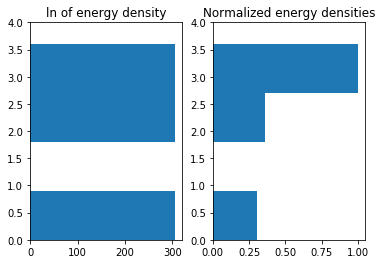

In [25]:
bins = list(freqs.keys())
values = list(freqs.values())
print('bins:\t', bins)
print('valus:\t', values)

plt.subplot(121)
plt.title("ln of energy density")
print(bins)
plt.hist(bins, weights=values, bins=len(bins), orientation='horizontal')
plt.ylim((0, 4))

plt.subplot(122)
max_val = max(values)
norm_values = [np.e ** (value - max_val) for value in values]
plt.title("Normalized energy densities")
plt.hist(bins, weights=norm_values, bins=len(bins), orientation='horizontal')
plt.ylim((0, 4))

print('densities:\t ', _get_density(norm_values))

## Visual verification

Class 0: 0.213200 points
Class 1: 0.000000 points
Class 2: 0.212800 points
Class 3: 0.574000 points


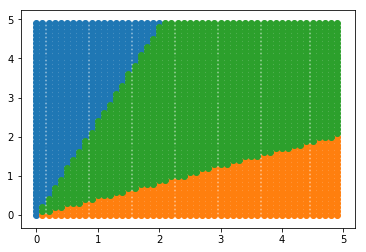

In [26]:
line = np.arange(0, 5, 0.1)
box = np.array([[x, y] for x in line for y in line])

energy_func = wl_configs['energy']
classes = {i: [] for i in range(4)}
for point in box:
    classes[energy_func(point)].append(point)

for points in classes.values():
    if len(points) != 0:
        x, y = zip(*points)
        colors = np.random.rand()
    #     plt.scatter(points[:,0], points[:,1], c=colors, alpha=0.5)
        plt.scatter(x, y)

for i in classes.keys():
    print("Class %d: %f points" % (i, len(classes[i]) / 2500.0))
